**Column Details:**
- **Booking_ID**: Unique identifier for each booking.
- **no_of_adults**: Number of adult guests in the booking.
- **no_of_children**: Number of child guests in the booking.
- **no_of_weekend_nights**: Nights stayed over the weekend.
- **no_of_week_nights**: Nights stayed during weekdays.
- **type_of_meal_plan**: Type of meal plan selected (if any).
- **required_car_parking_space**: Whether a car parking space was requested (1 = yes, 0 = no).
- **room_type_reserved**: Type of room reserved for the booking.
- **lead_time**: Number of days between booking and check-in date.
- **arrival_year**: Year of arrival.
- **arrival_month**: Month of arrival.
- **arrival_date**: Day of the month the guest is scheduled to arrive.
- **market_segment_type**: Source channel through which the booking was made.
- **repeated_guest**: Indicates if the guest has booked previously (1 = yes, 0 = no).
- **no_of_previous_cancellations**: Count of past cancellations made by the guest.
- **no_of_previous_bookings_not_canceled**: Number of prior bookings completed by the guest.
- **avg_price_per_room**: Average price per room per night.
- **no_of_special_requests**: Number of special service requests made.
- **booking_status**: Final status of the booking (Canceled or Not_Canceled).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [7]:
# Checking for missing values
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
# checking for any duplicate rows
print(df.duplicated().any())

False


In [9]:
# Let's separate categorical and numerical columns
col = df.dtypes == 'object'
obj_cols = (col[col] == True).index
col = df.dtypes != 'object'
num_cols = (col[col] == True).index
print("Categorical columns are: ", list(obj_cols))
print("Numerical columns are: ", list(num_cols))

Categorical columns are:  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical columns are:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [10]:
# Let's find all the unique values of all the categorical columns
for col in obj_cols:
  print(f'{col} : {df[col].unique()} : {len(df[col].unique())}')

Booking_ID : ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275'] : 36275
type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] : 4
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] : 7
market_segment_type : ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] : 5
booking_status : ['Not_Canceled' 'Canceled'] : 2


* From above we can say that Booking_ID is hardly of any use, we can consider removing it
* Other columns also gives us a solid understanding of what kind of data we are expecting to work with.
* We have 3 types of meal plan and one "Non Selected" option
* We have a diverse selection of rooms through 1 to 7
* We can also separate the customers based on market segments like Online, Offline, Corporate, Aciationm and Complementary
* At last our target column booking status: cancelled/not cancelled

In [11]:
# Removing Booking_ID col
df.drop('Booking_ID', axis=1, inplace=True)

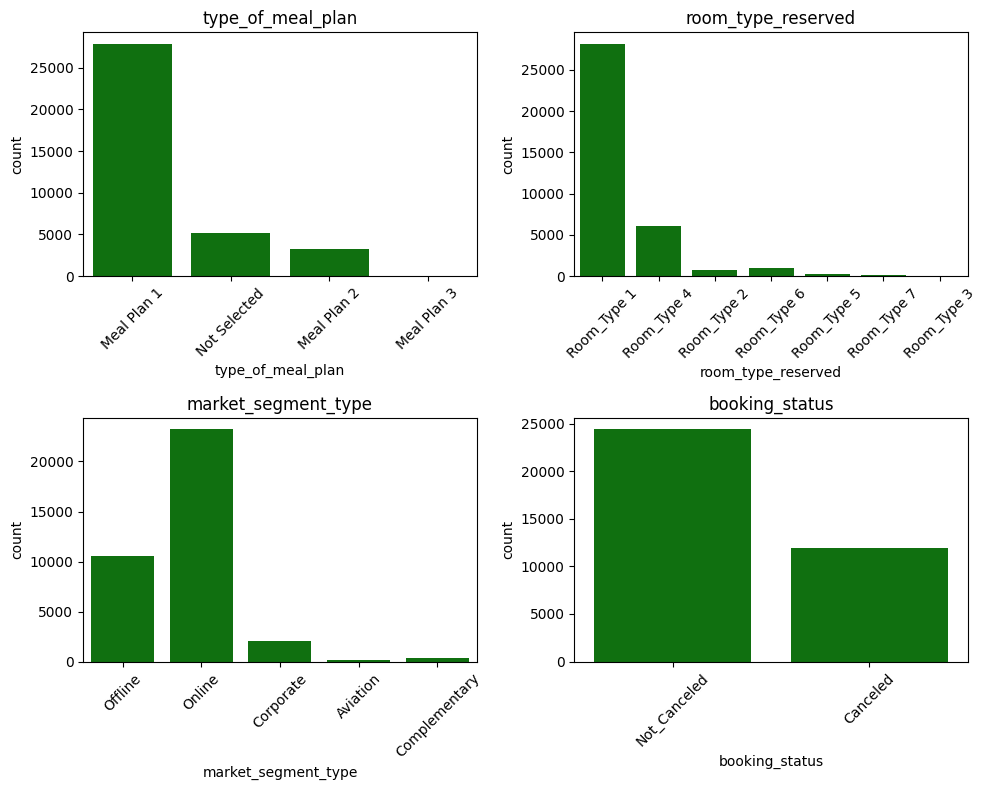

In [12]:
# Let's find count plot of all the categorical columns
plt.figure(figsize=(10,8))
index=0
for col in obj_cols[1:]:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col], color='Green')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Based on above plots we can say:**
* Their most ordered meal plan is Mean Plan 1
* Their most reserved room type is Room Type 1
* Most of their bookings comes under online market segment
* More than half of their customers do not cancel the reservation which can be a good or bad thing depending on the situations.

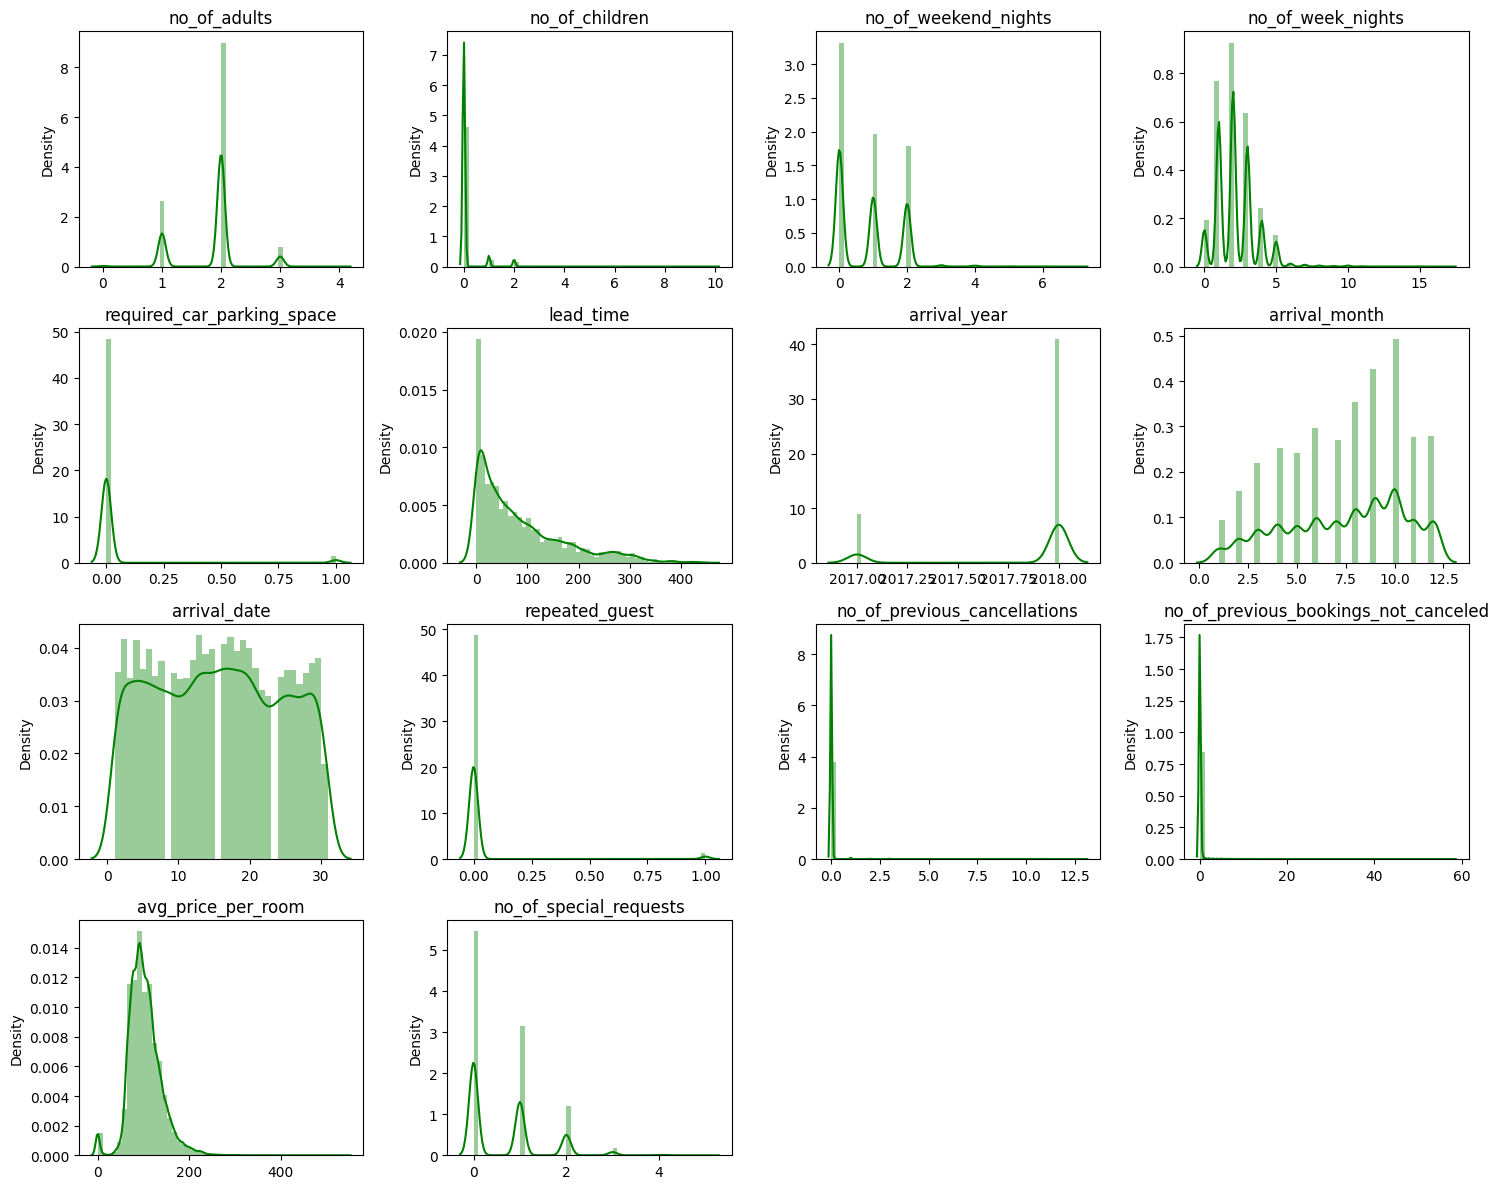

In [13]:
plt.figure(figsize=(15,12))
index=0
for col in num_cols:
    index += 1
    plt.subplot(4, 4, index)
    sns.distplot(x=df[col], color='Green')
    plt.title(col)
plt.tight_layout()
plt.show()

**Based on above density plots for all the numerical values, we can say that**
* Most of the columns appears to be Right skewed.
* Only arrival_date appears to be Normally Distributed.
* Judging from first 2 plots we can speculate, 2 adults and no children is most choosen record in their hotel.
* We are having people booking throughout the week,
* Most of the customers do not require parking space apparently.
* The plot says most of the booking are done in the beginning of the year.
* Where as arrival_month suggest there is steady flow of customers all over the year.
* There are hardly any repeated guests so maybe they are not liking our servives, we can take feedback learn where we are lacking and why would they not consider coming to our hotel again.
* We do get special requests, but many don't ask for that which is a good sign.
* Average price per room seems to be quite reasonable, it also implies that room_type_1 is the most sold.

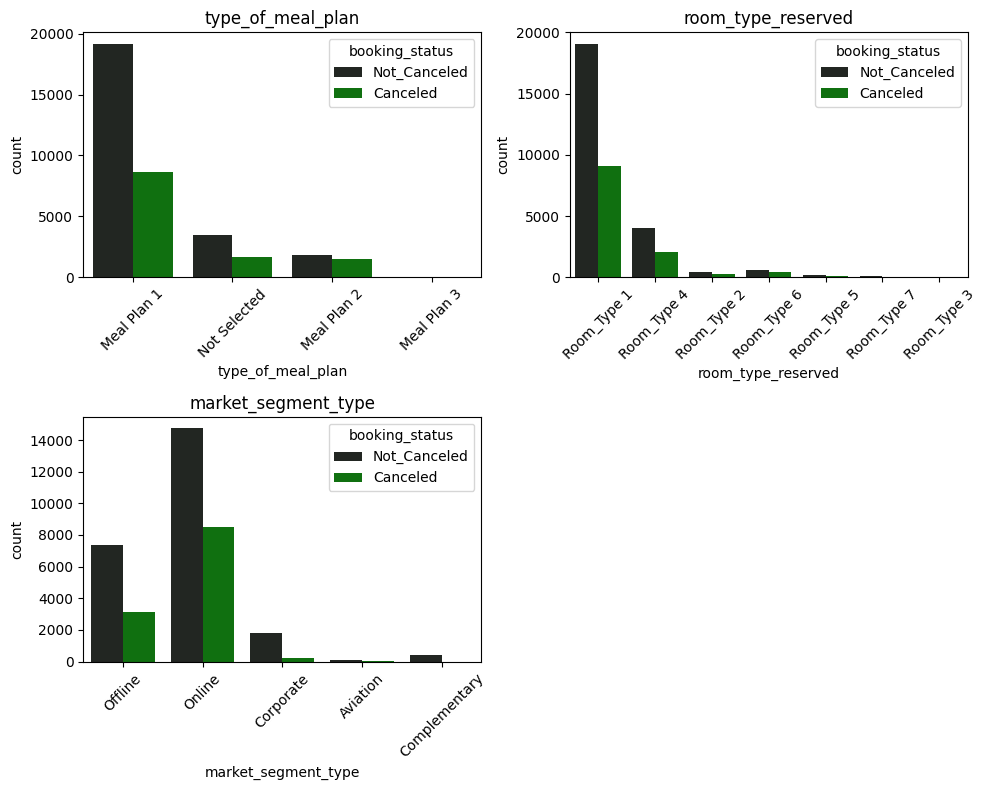

In [14]:
# Let's find count plot of all the categorical columns vs Target column
plt.figure(figsize=(10,8))
index=0
for col in obj_cols[1:4]:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col], hue = df["booking_status"], color='Green')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This view gives us an interesting perspective of booking_status for the categorical columns.
* We do have decent amount of bookings getting cancelled but throughout it doesn't seem like it would point to a particular reason for cancellation.

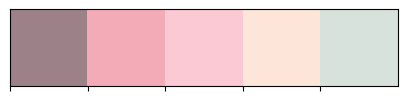

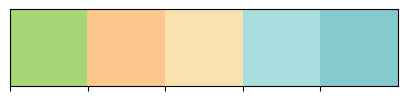

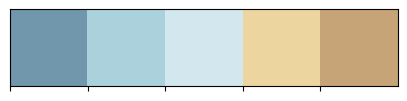

In [15]:
colors_peach =['#9D8189', '#F3ABB7', '#FAC9D4','#FEE5D9' ,'#D8E2DC']
colors_mix = ['#A7D676', '#FBC78D', '#F9E2AE','#A8DEE0','#85CBCC']
colors_sandy = ['#7097AB', '#ABD1DC' ,'#D3E7EE','#ECD59F', '#C6A477']

sns.palplot(colors_peach)
sns.palplot(colors_mix)
sns.palplot(colors_sandy)

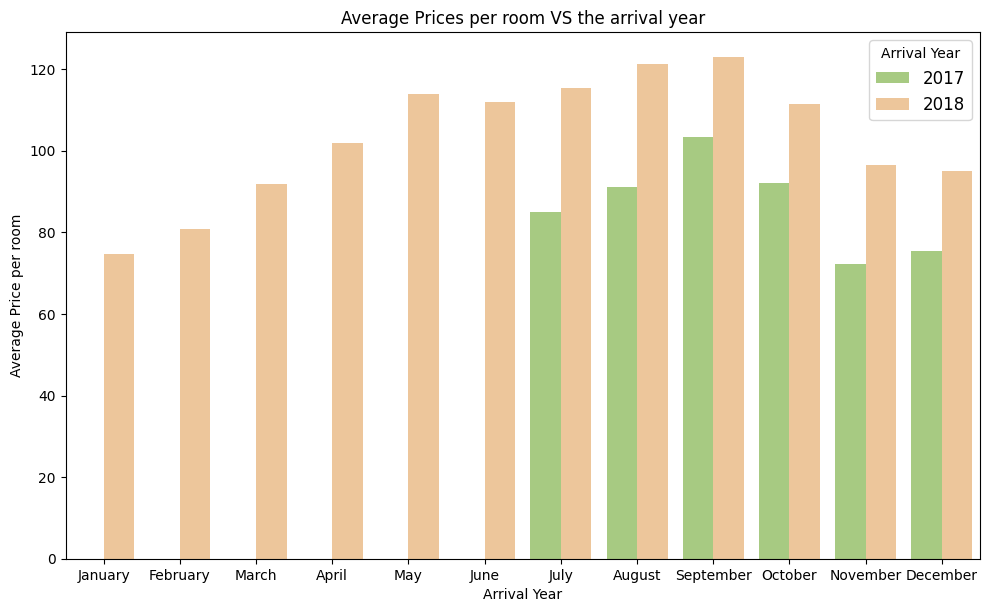

In [16]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data = df, x = 'arrival_month', y='avg_price_per_room', hue='arrival_year', palette=colors_mix, errorbar=None) #Plot to compare against the years

plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] ,labels=['January','February','March', 'April' , 'May' ,'June' ,'July', 'August', 'September', 'October', 'November', 'December'])

ax.set_xlabel('Arrival Year')
ax.set_ylabel('Average Price per room')
ax.set_title('Average Prices per room VS the arrival year')
ax.legend(title="Arrival Year", loc="upper right", fontsize=12)
plt.show()

* We can observe a steady increase in average room price from jan to september in the year 2018 but also decrease towards the end of year during winter.
* We can also gague out that trend follows for the year 2017 as well.

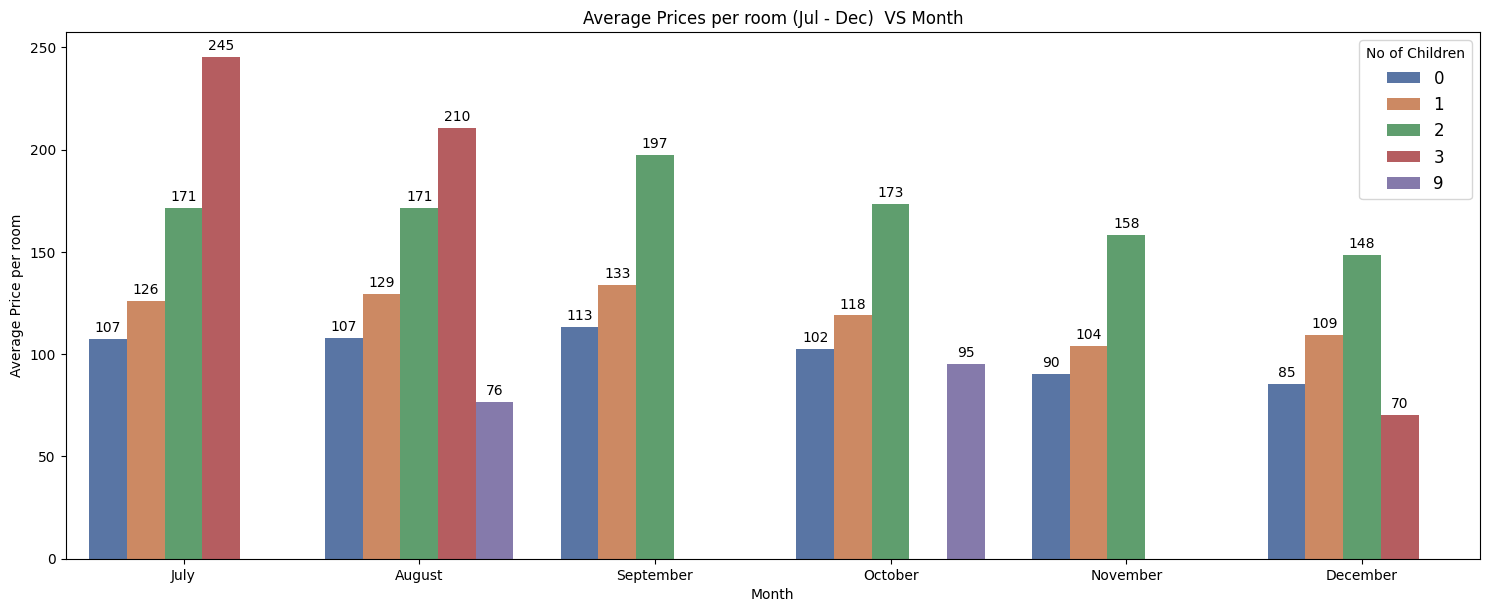

In [17]:
plt.figure(figsize=(15,6))


df_months_comparison = df[df['arrival_month'].between(7, 12)] #The data of 2017 started from July to December, so this will be used to compare only against 2018 instead of the entire year of 2018

ax = sns.barplot(data =df_months_comparison, x = 'arrival_month', y='avg_price_per_room', hue='no_of_children' ,palette='deep', errorbar=None)


for container in ax.containers:
    ax.bar_label(
        container,
        label_type='edge',
        fontsize=10,
        padding=3,
        labels=[str(int(value)) if not np.isnan(value) else '0' for value in container.datavalues]
    )

plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xlabel('Month')
ax.set_ylabel('Average Price per room')
ax.set_title('Average Prices per room (Jul - Dec)  VS Month')
ax.legend(title="No of Children", loc="upper right", fontsize=12)
plt.show()

* We can observe here the number of children that comes here with their parents are mostly numbered from 0-3 although we can see a number 9 in 2 specific months Aug and Oct but this is probably an outlier
* We can also observe here the average price per room increases as the number of children increases which is to be expected for better maintenance.


In [18]:
df['monthly_sales'] = df['arrival_month'] * df['avg_price_per_room']

df_monthly_sales = df.groupby('arrival_month')['monthly_sales'].sum().reset_index()

print(df_monthly_sales)

    arrival_month  monthly_sales
0               1       75796.26
1               2      275140.26
2               3      649985.28
3               4     1116274.88
4               5     1478400.70
5               6     2151772.20
6               7     2282112.07
7               8     3453174.32
8               9     4810021.11
9              10     5554184.60
10             11     2992336.27
11             12     3224694.60


In [21]:
print(df_monthly_sales.max())

arrival_month         12.0
monthly_sales    5554184.6
dtype: float64
